In [1]:
from datetime import datetime
import xarray as xr
import rioxarray as rxr
from glob import glob
import os

In [2]:
def paths_to_datetime_index(paths):
    return  [datetime.strptime(date_str.split('/')[1].split("\\")[1], '%Y%m%d') for date_str in paths]

In [3]:
data_dir = "../clipped_images"
scenes = []
scene_directories = glob(os.path.join(data_dir, '*/'))

In [4]:
time_var = xr.Variable('time', paths_to_datetime_index(scene_directories))
time_var

<xarray.Variable (time: 14)>
array(['2021-03-01T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-26T00:00:00.000000000', '2021-06-04T00:00:00.000000000',
       '2021-08-18T00:00:00.000000000', '2021-09-07T00:00:00.000000000',
       '2021-10-17T00:00:00.000000000', '2021-12-16T00:00:00.000000000',
       '2022-01-15T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-03-06T00:00:00.000000000', '2022-03-21T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [5]:
for scene_dir in scene_directories:
    bands = []
    band_paths = glob(os.path.join(scene_dir, '*20m.tif'))
    for band_path in band_paths:
        band_name = band_path.split("\\")[-1].split('_')[2]
#         print(band_name)
        band = rxr.open_rasterio(band_path, chunks={'x':512, 'y':512}) # Specify chunk size
        band['band'] = [band_name] #[band_path.split('_')[2]]
        bands.append(band)
    scene = xr.concat(bands, dim='band')
    scenes.append(scene)

In [7]:
time_series_scenes = xr.concat(scenes, dim=time_var)

In [8]:
time_series_scenes

,Array,Chunk
Bytes,258.69 MiB,2.05 MiB
Shape,"(14, 9, 394, 683)","(1, 1, 394, 683)"
Count,1372 Tasks,126 Chunks
Type,float64,numpy.ndarray


In [10]:
rgb_bands = ['B04', 'B03', 'B02']

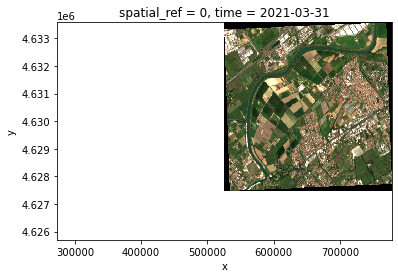

In [20]:
time_series_scenes.sel(band=rgb_bands).isel(time=1).plot.imshow(robust=True)

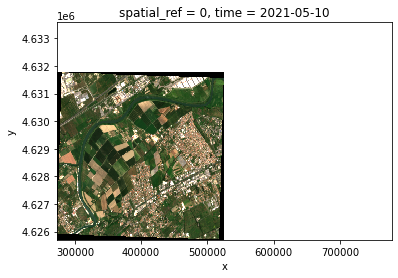

In [21]:
time_series_scenes.sel(band=rgb_bands).isel(time=3).plot.imshow(robust=True)

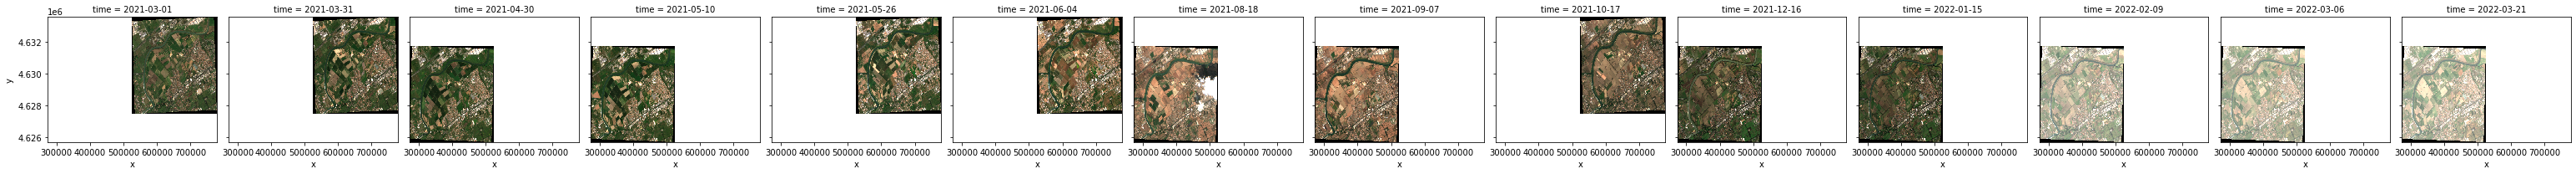

In [23]:
time_series_scenes.sel(band=rgb_bands).plot.imshow(col='time', robust=True)

In [25]:
# sample = time_series_scenes[:,:, 300000:400000, 4625000:4630000]
# sample.sel(band=rgb_bands).plot.imshow(col='time', robust=True)

In [27]:
# sample.groupby('time.month').mean(dim='time').sel(band=rgb_bands).plot.imshow(col='month', robust=True)